**Pandas Time Series Data**

The Pandas Python package makes it absolutely painless to handle time series data (TS). Solving time series problems in Python is not so much fun sometimes. But, because Pandas dedicated libraries contain many timeseries object optimizations, solving TS problems with Pandas can be done in a straightforward manner.  

The Pandas library provides simple, but powerful tools to perform any data tasks, especially when it comes to time series data. 

The NumPy datatime64[ns] and timedelta64 dtypes definitely make my job a lot more fun. I use Pandas every day, so you can take my word for it. 

In this notebook I will be covering 3 basic functionalities for manipulating time series data:

* Date Ranges
* DatetimeIndex & Timestamps
* Resampling

**Date Ranges**

First, we will create a Datetimeindex with the frequency of one hour.  The date range will be from January 1st. 2016 to the date of this notebook, November 30th. 
In this notebook I am using Pandas version '0.19.1' for the examples.

In [375]:
# First we import Pandas, NumPy and Matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sn
pd.__version__

'0.19.1'

In [376]:
hours = pd.date_range('1/1/2016', '11/30/2016', freq='H')
hours # displaying the first and the last 10 rows.

DatetimeIndex(['2016-01-01 00:00:00', '2016-01-01 01:00:00',
               '2016-01-01 02:00:00', '2016-01-01 03:00:00',
               '2016-01-01 04:00:00', '2016-01-01 05:00:00',
               '2016-01-01 06:00:00', '2016-01-01 07:00:00',
               '2016-01-01 08:00:00', '2016-01-01 09:00:00',
               ...
               '2016-11-29 15:00:00', '2016-11-29 16:00:00',
               '2016-11-29 17:00:00', '2016-11-29 18:00:00',
               '2016-11-29 19:00:00', '2016-11-29 20:00:00',
               '2016-11-29 21:00:00', '2016-11-29 22:00:00',
               '2016-11-29 23:00:00', '2016-11-30 00:00:00'],
              dtype='datetime64[ns]', length=8017, freq='H')

Next, we construct a DataFrame assigning ***hours*** , the DatetimeIndex values, to one of the columns and assigning random integers to the other column.

In [377]:
np.random.seed(seed=1111)
data = np.random.randint(1, high=100, size=len(hours))
df = pd.DataFrame({'col1': hours, 'col2': data})
df.head(10)

,col1,col2
0,2016-01-01 00:00:00,29
1,2016-01-01 01:00:00,56
2,2016-01-01 02:00:00,82
3,2016-01-01 03:00:00,13
4,2016-01-01 04:00:00,35
5,2016-01-01 05:00:00,53
6,2016-01-01 06:00:00,25
7,2016-01-01 07:00:00,23
8,2016-01-01 08:00:00,21
9,2016-01-01 09:00:00,12


In [378]:
df.info()# Here is a short summary of a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8017 entries, 0 to 8016
Data columns (total 2 columns):
col1    8017 non-null datetime64[ns]
col2    8017 non-null int32
dtypes: datetime64[ns](1), int32(1)
memory usage: 94.0 KB


We can select a time period between 2 dates from our DataFrame creating a new object ***selected_period***:

In [379]:
selected_period = df[(df['col1'] > '2016-04-30 23:00:00') & (df['col1'] < '2016-05-02 01:00:00')]
selected_period # We selected a 24 hour period.

,col1,col2
2904,2016-05-01 00:00:00,49
2905,2016-05-01 01:00:00,19
2906,2016-05-01 02:00:00,94
2907,2016-05-01 03:00:00,8
2908,2016-05-01 04:00:00,69
2909,2016-05-01 05:00:00,32
2910,2016-05-01 06:00:00,42
2911,2016-05-01 07:00:00,54
2912,2016-05-01 08:00:00,19
2913,2016-05-01 09:00:00,64


Selecting a period is simpler, if we set 'Col1' as the index.

In [380]:
df = df.set_index('col1')
df.head()

,col2
col1,
2016-01-01 00:00:00,29
2016-01-01 01:00:00,56
2016-01-01 02:00:00,82
2016-01-01 03:00:00,13
2016-01-01 04:00:00,35


The index is now a DatetimeIndex not a RangeIndex.

In [381]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8017 entries, 2016-01-01 00:00:00 to 2016-11-30 00:00:00
Data columns (total 1 columns):
col2    8017 non-null int32
dtypes: int32(1)
memory usage: 93.9 KB


Now that we set our DatetimeIndex as the index, we can select the same 24 hour period using **DataFrame.ix()**, a label-location based indexer. 

We will create a slice object with labels '2016-05-01 00:00:00':'2016-05-02 00:00:00'. Unlike in python slices, both the start and the stop are included here!

Note, that to select the same 24 hours period, the slicing **'2016-05-01 00:00:00' : '2016-05-02 00:00:00'**  must be different here from our previous selection **df[(df['col1'] > '2016-04-30 23:00:00')  &  (df['col1'] < '2016-05-02 01:00:00')]** .

In [382]:
one_day = df.ix['2016-05-01 00:00:00':'2016-05-02 00:00:00']
one_day

,col2
col1,
2016-05-01 00:00:00,49
2016-05-01 01:00:00,19
2016-05-01 02:00:00,94
2016-05-01 03:00:00,8
2016-05-01 04:00:00,69
2016-05-01 05:00:00,32
2016-05-01 06:00:00,42
2016-05-01 07:00:00,54
2016-05-01 08:00:00,19


With Pandas, we can easily visualize the data.

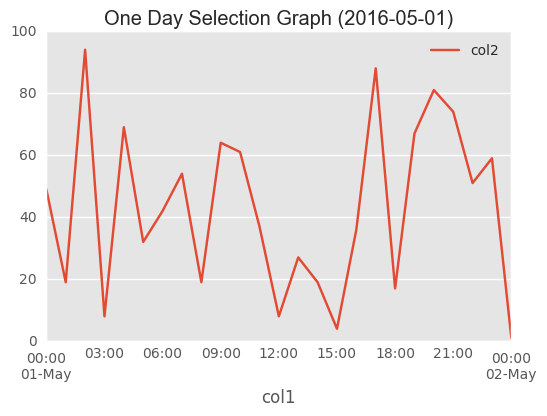

In [383]:
one_day.plot(title= 'One Day Selection Graph (2016-05-01)')

Now, that we selected a 24 hour period, let's have some fun with this. So, what can we do with this data...

Let's say, we are interested in the hourly fluctuation (rise and fall) of the values during the selected 24 hours. Pandas makes this task very easy.

We will use Pandas **DataFrame.shift()** to shift the index by 1 hour (1 row). 

In [384]:
one_day.shift(1)

,col2
col1,
2016-05-01 00:00:00,NaN
2016-05-01 01:00:00,49.0
2016-05-01 02:00:00,19.0
2016-05-01 03:00:00,94.0
2016-05-01 04:00:00,8.0
2016-05-01 05:00:00,69.0
2016-05-01 06:00:00,32.0
2016-05-01 07:00:00,42.0
2016-05-01 08:00:00,54.0


All we have to do now is to subtract the shifted data frame from the original ***one_day*** before the shift and we can see the rise and fall of the values every hour of the day.

Positive values show the rise and negative values indicate the fall for each hour of the selected period.

This is a neat little trick...

In [385]:
fluctuation = one_day - one_day.shift(1)
fluctuation

,col2
col1,
2016-05-01 00:00:00,NaN
2016-05-01 01:00:00,-30.0
2016-05-01 02:00:00,75.0
2016-05-01 03:00:00,-86.0
2016-05-01 04:00:00,61.0
2016-05-01 05:00:00,-37.0
2016-05-01 06:00:00,10.0
2016-05-01 07:00:00,12.0
2016-05-01 08:00:00,-35.0


This is how it looks like when the original values and the fluctuation are side by side.

In [386]:
fluctuation_plot = pd.DataFrame({'Data': one_day['col2'], 'Fluctuation': fluctuation['col2'] })
fluctuation_plot

,Data,Fluctuation
col1,,
2016-05-01 00:00:00,49,NaN
2016-05-01 01:00:00,19,-30.0
2016-05-01 02:00:00,94,75.0
2016-05-01 03:00:00,8,-86.0
2016-05-01 04:00:00,69,61.0
2016-05-01 05:00:00,32,-37.0
2016-05-01 06:00:00,42,10.0
2016-05-01 07:00:00,54,12.0
2016-05-01 08:00:00,19,-35.0


We can also easily visualize the values and the fluctuation throughout the selected day.

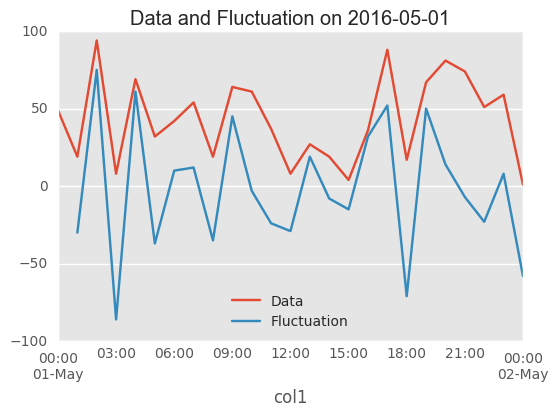

In [387]:
fluctuation_plot.plot(title= 'Data and Fluctuation on 2016-05-01')

**DatetimeIndex & Timestamps**

Another type of timeseries data that's worth mentioning is **time-stamped data**. 

Creating a Timestamp couldn't be simpler. 

In [388]:
pd.Timestamp('2016-11-30') # Just apply pd.Timestamp

Timestamp('2016-11-30 00:00:00')

In [389]:
pd.Timestamp(2016, 11, 29)

Timestamp('2016-11-29 00:00:00')

To convert a Series to DatetimeIndex, we use the **pandas.to_datetime()** function. In the DataFrame below, the Date Time column contains 'date-like' values. But when we check the type (.dtypes), we can see that the data type is not datetime64[ns].

Thanks to Pandas, all we will have to do to convert this object to datetime64[ns] is to apply the to_datetime function.

In [390]:
d = pd.DataFrame({'Date Time': ['1/26/2016 07:03', '1/26/2016 07:00', '1/26/2016 14:46', '1/26/2016 17:46', '1/26/2016 14:48'], 'Col1': ['a','b','c','d','e']})
d

,Col1,Date Time
0,a,1/26/2016 07:03
1,b,1/26/2016 07:00
2,c,1/26/2016 14:46
3,d,1/26/2016 17:46
4,e,1/26/2016 14:48


In [391]:
d.dtypes

Col1         object
Date Time    object
dtype: object

In [392]:
d['Date Time'] = pd.to_datetime(d['Date Time']) # Converting to datetime64[ns]
d

,Col1,Date Time
0,a,2016-01-26 07:03:00
1,b,2016-01-26 07:00:00
2,c,2016-01-26 14:46:00
3,d,2016-01-26 17:46:00
4,e,2016-01-26 14:48:00


In [393]:
d.dtypes # Date Time column is converted

Col1                 object
Date Time    datetime64[ns]
dtype: object

The Date Time column values are now converted to datetime64[ns].
Yes, it is that simple. This is why we love Pandas.

**Resampling**

Resampling is a powerful functionality used for frequency conversion. We will apply this function to our data **one_day** which we selected earlier for a 24 hour period.

Remember, the frequency of our original data is one hour. We will apply **DataFrame.resample()** to convert the hourly frequency to a 6 hour frequency data and check the mean for each 6 hour period within the selected 24 hours.

Again, this is another situation where we only need to use a short, simple 'one-liner' code. 

Under the hood, Pandas .resample() is a time-based groupby, followed by a reduction method on each of its groups. Resampling comes in handy in financial applications but it can be useful in many other areas as well.

In [394]:
one_day.resample('6H').mean()[:-1]

,col2
col1,
2016-05-01 00:00:00,45.166667
2016-05-01 06:00:00,46.166667
2016-05-01 12:00:00,30.333333
2016-05-01 18:00:00,58.166667


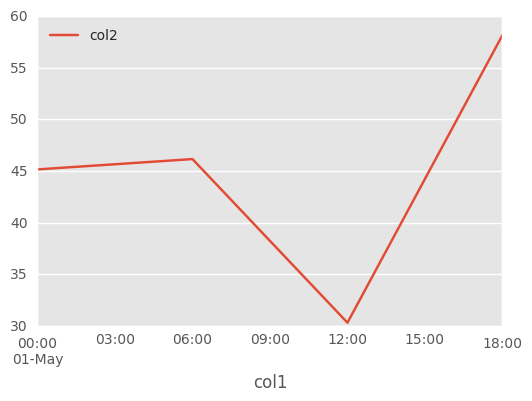

In [395]:
one_day.resample('6H').mean()[:-1].plot()

We can also check the sum of the values in each 6 hour period.

In [396]:
one_day.resample('6H').sum()[:-1]

,col2
col1,
2016-05-01 00:00:00,271
2016-05-01 06:00:00,277
2016-05-01 12:00:00,182
2016-05-01 18:00:00,349


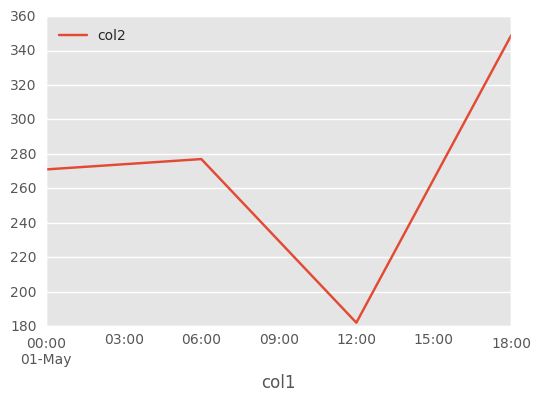

In [397]:
one_day.resample('6H').sum()[:-1].plot()

There are, of course, many advanced TS functions; I just wanted to present a glimpse into Pandas TS with these simple examples of the most basic Pandas TS functionalities.

Joe T. Boka 
Tenger Data Technologies Ltd. 
www.tengerdata.com
2016-11-30